# Data cleansing and transformation done on the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# First of all, we import all the packages that are required in this porject. 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import datetime

In [2]:
data = pd.read_csv("bank-full.csv")

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# I - Missing Values

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
data["age"] = data["age"].transform(lambda x: x.fillna(x.mean()))
data["balance"] = data["balance"].transform(lambda x: x.fillna(x.mean()))
data["day"] = data["day"].transform(lambda x: x.fillna(x.mean()))
data["duration"] = data["duration"].transform(lambda x: x.fillna(x.mean()))
data["campaign"] = data["campaign"].transform(lambda x: x.fillna(x.mean()))
data["pdays"] = data["pdays"].transform(lambda x: x.fillna(x.mean()))
data["previous"] = data["previous"].transform(lambda x: x.fillna(x.mean()))

In [4]:
data["job"] = data["job"].transform(lambda x: x.fillna(x.mode()[0]))
data["marital"] = data["marital"].transform(lambda x: x.fillna(x.mode()[0]))
data["education"] = data["education"].transform(lambda x: x.fillna(x.mode()[0]))
data["default"] = data["default"].transform(lambda x: x.fillna(x.mode()[0]))
data["housing"] = data["housing"].transform(lambda x: x.fillna(x.mode()[0]))
data["loan"] = data["loan"].transform(lambda x: x.fillna(x.mode()[0]))
data["contact"] = data["contact"].transform(lambda x: x.fillna(x.mode()[0]))
data["month"] = data["month"].transform(lambda x: x.fillna(x.mode()[0]))
data["poutcome"] = data["poutcome"].transform(lambda x: x.fillna(x.mode()[0]))

In [21]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# II - Outliers

# Identifying Outliers:

## 1 - IQR Method

In [3]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = (Q3 + 1.5 * IQR)

In [6]:
 outliers = (
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

outliers

age          1.077171
balance     10.459844
day          0.000000
duration     7.155338
campaign     6.777112
pdays       18.263255
previous    18.263255
dtype: float64

## 2 - Z-Score

In [33]:
threshold=2
z_scores = np.abs(stats.zscore(data.select_dtypes(include=["float64", "int64"])))
outliers = np.where(z_scores > threshold)
outliers[0]

array([   34,    37,    43, ..., 45208, 45208, 45210], dtype=int64)

# Handling Outliers:

## 1 - Removing Outliers:

In [9]:
def find_outliers_iqr(df):
    # Calculate the first quartile (Q1)
    q1 = np.percentile(df, 25)
    
    # Calculate the third quartile (Q3)
    q3 = np.percentile(df, 75)
    
    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = [value for value in df if value < lower_bound or value > upper_bound]
    
    return outliers

outliers = find_outliers_iqr(data['age'])


print("Outliers:", outliers)


Outliers: [83, 75, 75, 83, 75, 72, 71, 76, 83, 71, 85, 72, 90, 71, 82, 73, 74, 71, 75, 78, 85, 80, 71, 78, 73, 75, 94, 72, 83, 79, 78, 83, 73, 76, 83, 77, 73, 74, 73, 77, 71, 71, 80, 82, 75, 77, 78, 78, 86, 76, 72, 74, 77, 74, 79, 71, 74, 78, 73, 73, 95, 74, 71, 78, 71, 75, 75, 82, 74, 81, 76, 72, 75, 72, 71, 72, 77, 73, 85, 83, 78, 73, 79, 71, 71, 80, 72, 78, 79, 71, 82, 81, 79, 71, 79, 79, 73, 75, 72, 71, 75, 78, 75, 80, 80, 74, 73, 71, 72, 72, 77, 79, 73, 71, 80, 71, 83, 71, 73, 78, 72, 81, 81, 71, 74, 75, 82, 80, 76, 74, 74, 77, 71, 71, 77, 76, 72, 74, 74, 72, 73, 82, 77, 71, 79, 89, 76, 81, 74, 73, 71, 71, 77, 72, 84, 86, 72, 72, 76, 73, 74, 82, 71, 83, 72, 73, 73, 74, 72, 78, 86, 76, 79, 71, 81, 77, 82, 72, 73, 73, 74, 71, 73, 76, 71, 71, 83, 71, 80, 79, 77, 74, 84, 95, 77, 78, 79, 83, 83, 73, 77, 72, 74, 83, 76, 73, 81, 80, 75, 74, 75, 77, 83, 72, 81, 73, 74, 80, 72, 76, 72, 77, 74, 87, 76, 92, 78, 82, 78, 76, 73, 77, 76, 73, 82, 81, 80, 71, 76, 74, 75, 72, 80, 84, 87, 72, 76, 7

In [10]:
def remove_outliers(data):
    outliers = find_outliers_iqr(data)
    cleaned_data = [value for value in data if value not in outliers]
    return cleaned_data


In [11]:
remove_outliers(data['age'])

[58,
 44,
 33,
 47,
 33,
 35,
 28,
 42,
 58,
 43,
 41,
 29,
 53,
 58,
 57,
 51,
 45,
 57,
 60,
 33,
 28,
 56,
 32,
 25,
 40,
 44,
 39,
 52,
 46,
 36,
 57,
 49,
 60,
 59,
 51,
 57,
 25,
 53,
 36,
 37,
 44,
 50,
 60,
 54,
 58,
 36,
 58,
 44,
 55,
 29,
 54,
 48,
 32,
 42,
 24,
 38,
 38,
 47,
 40,
 46,
 32,
 53,
 57,
 33,
 49,
 51,
 60,
 59,
 55,
 35,
 57,
 31,
 54,
 55,
 43,
 53,
 44,
 55,
 49,
 55,
 45,
 47,
 42,
 59,
 46,
 51,
 56,
 41,
 46,
 57,
 42,
 30,
 60,
 60,
 57,
 36,
 55,
 60,
 39,
 46,
 44,
 53,
 52,
 59,
 27,
 44,
 47,
 34,
 59,
 45,
 29,
 46,
 56,
 36,
 59,
 44,
 41,
 33,
 59,
 57,
 56,
 51,
 34,
 43,
 52,
 33,
 29,
 34,
 31,
 55,
 55,
 32,
 38,
 55,
 28,
 23,
 32,
 43,
 32,
 46,
 53,
 34,
 57,
 37,
 59,
 33,
 56,
 48,
 43,
 54,
 51,
 26,
 40,
 39,
 50,
 41,
 51,
 60,
 52,
 48,
 48,
 39,
 47,
 40,
 45,
 26,
 52,
 54,
 54,
 50,
 35,
 44,
 53,
 35,
 60,
 53,
 48,
 34,
 54,
 51,
 31,
 35,
 35,
 38,
 36,
 58,
 40,
 54,
 34,
 31,
 51,
 33,
 55,
 42,
 34,
 33,
 38,
 50,
 43,
 61,


In [12]:
remove_outliers(data['balance'])

[2143,
 29,
 2,
 1506,
 1,
 231,
 447,
 2,
 121,
 593,
 270,
 390,
 6,
 71,
 162,
 229,
 13,
 52,
 60,
 0,
 723,
 779,
 23,
 50,
 0,
 -372,
 255,
 113,
 -246,
 265,
 839,
 378,
 39,
 0,
 63,
 -7,
 -3,
 506,
 0,
 2586,
 49,
 104,
 529,
 96,
 -171,
 -364,
 0,
 0,
 0,
 1291,
 -244,
 0,
 -76,
 -103,
 243,
 424,
 306,
 24,
 179,
 0,
 989,
 249,
 790,
 154,
 100,
 59,
 1205,
 25,
 282,
 23,
 1937,
 384,
 582,
 91,
 0,
 1,
 206,
 164,
 690,
 2343,
 137,
 173,
 45,
 1270,
 16,
 486,
 50,
 152,
 290,
 54,
 -37,
 101,
 383,
 81,
 0,
 229,
 -674,
 90,
 128,
 179,
 0,
 54,
 151,
 61,
 30,
 523,
 31,
 79,
 -34,
 448,
 81,
 144,
 351,
 -67,
 262,
 0,
 56,
 26,
 3,
 41,
 7,
 105,
 818,
 -16,
 0,
 2476,
 1185,
 217,
 1685,
 802,
 0,
 94,
 0,
 0,
 517,
 265,
 947,
 3,
 42,
 37,
 57,
 22,
 8,
 293,
 3,
 348,
 -19,
 0,
 -4,
 18,
 139,
 0,
 1883,
 216,
 782,
 904,
 1705,
 47,
 176,
 1225,
 86,
 82,
 271,
 1378,
 184,
 0,
 0,
 1357,
 19,
 434,
 92,
 1151,
 41,
 51,
 214,
 1161,
 37,
 787,
 59,
 253,
 211,


In [13]:
remove_outliers(data['day'])

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [14]:
remove_outliers(data['duration'])

[261,
 151,
 76,
 92,
 198,
 139,
 217,
 380,
 50,
 55,
 222,
 137,
 517,
 71,
 174,
 353,
 98,
 38,
 219,
 54,
 262,
 164,
 160,
 342,
 181,
 172,
 296,
 127,
 255,
 348,
 225,
 230,
 208,
 226,
 336,
 242,
 365,
 577,
 137,
 160,
 180,
 22,
 616,
 242,
 355,
 225,
 160,
 363,
 266,
 253,
 179,
 145,
 174,
 104,
 13,
 185,
 138,
 164,
 391,
 357,
 91,
 528,
 273,
 158,
 177,
 258,
 172,
 154,
 291,
 181,
 176,
 211,
 349,
 272,
 208,
 193,
 212,
 20,
 246,
 529,
 188,
 180,
 48,
 213,
 583,
 221,
 173,
 426,
 287,
 101,
 203,
 197,
 257,
 124,
 229,
 55,
 400,
 197,
 190,
 21,
 514,
 194,
 144,
 212,
 286,
 107,
 247,
 518,
 364,
 178,
 98,
 439,
 79,
 120,
 127,
 175,
 262,
 61,
 78,
 143,
 579,
 345,
 185,
 100,
 125,
 193,
 136,
 73,
 528,
 541,
 163,
 301,
 46,
 204,
 98,
 71,
 157,
 243,
 186,
 579,
 163,
 610,
 85,
 114,
 114,
 57,
 238,
 93,
 128,
 107,
 181,
 303,
 558,
 270,
 228,
 99,
 240,
 233,
 250,
 252,
 138,
 130,
 412,
 179,
 19,
 458,
 313,
 416,
 146,
 167,
 315,
 1

In [15]:
remove_outliers(data['campaign'])

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 5,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 2,


In [16]:
remove_outliers(data['pdays'])

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


In [17]:
remove_outliers(data['previous'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## 2 - Transformations

In [26]:
transformed_age = np.log1p(data[[data.select_dtypes(include=["float64", "int64"]).columns[0]]])
transformed_age

,age
0,4.077537
1,3.806662
2,3.526361
3,3.871201
4,3.526361
...,...
45206,3.951244
45207,4.276666
45208,4.290459
45209,4.060443


In [27]:
transformed_age = np.log1p(data[[data.select_dtypes(include=["float64", "int64"]).columns[1]]])
transformed_age

,balance
0,7.670429
1,3.401197
2,1.098612
3,7.317876
4,0.693147
...,...
45206,6.716595
45207,7.455877
45208,8.651025
45209,6.505784


In [28]:
transformed_age = np.log1p(data[[data.select_dtypes(include=["float64", "int64"]).columns[2]]])
transformed_age

,day
0,1.791759
1,1.791759
2,1.791759
3,1.791759
4,1.791759
...,...
45206,2.890372
45207,2.890372
45208,2.890372
45209,2.890372


In [29]:
transformed_age = np.log1p(data[[data.select_dtypes(include=["float64", "int64"]).columns[3]]])
transformed_age

,duration
0,5.568345
1,5.023881
2,4.343805
3,4.532599
4,5.293305
...,...
45206,6.885510
45207,6.124683
45208,7.028201
45209,6.232448


In [30]:
transformed_age = np.log1p(data[[data.select_dtypes(include=["float64", "int64"]).columns[4]]])
transformed_age

,campaign
0,0.693147
1,0.693147
2,0.693147
3,0.693147
4,0.693147
...,...
45206,1.386294
45207,1.098612
45208,1.791759
45209,1.609438


In [31]:
transformed_age = np.log1p(data[[data.select_dtypes(include=["float64", "int64"]).columns[5]]])
transformed_age

,pdays
0,-inf
1,-inf
2,-inf
3,-inf
4,-inf
...,...
45206,-inf
45207,-inf
45208,5.220356
45209,-inf


In [32]:
transformed_age = np.log1p(data[[data.select_dtypes(include=["float64", "int64"]).columns[6]]])
transformed_age

,previous
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
45206,0.000000
45207,0.000000
45208,1.386294
45209,0.000000


## 3 - Imputation

In [10]:
def impute_outliers_with_median(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers_indices = np.where(z_scores > threshold)
    
    # Impute outliers with the median value
    data_copy = np.copy(data)
    median_value = np.median(data)
    data_copy[outliers_indices] = median_value
    
    return data_copy

In [11]:
outliers

age          1.077171
balance     10.459844
day          0.000000
duration     7.155338
campaign     6.777112
pdays       18.263255
previous    18.263255
dtype: float64

In [13]:
data['age'] = impute_outliers_with_median(data['age'], threshold=2)
data['balance'] = impute_outliers_with_median(data['balance'], threshold=2)
data['day'] = impute_outliers_with_median(data['day'], threshold=2)
data['duration'] = impute_outliers_with_median(data['duration'], threshold=2)
data['campaign'] = impute_outliers_with_median(data['campaign'], threshold=2)
data['pdays'] = impute_outliers_with_median(data['pdays'], threshold=2)
data['previous'] = impute_outliers_with_median(data['previous'], threshold=2)

# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# First of all, we import all the packages that are required in this porject. 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import datetime

In [3]:
data = pd.read_csv("bank-full.csv")

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# EDA

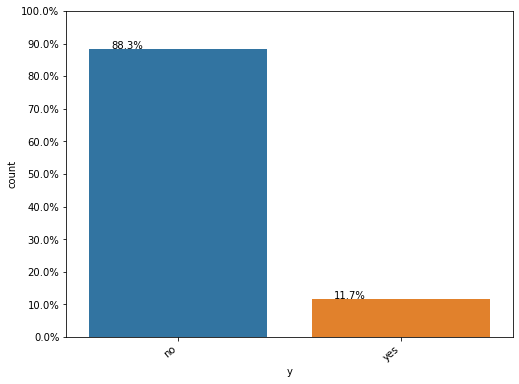

In [5]:
  plt.figure(figsize=(8,6))
  Y = data["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=data)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

We can see from the above plot that the dataset in imbalanced, where the number of no class is 88.3% and the number of yes class is 11.7%.

In [6]:
def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [22]:
data.select_dtypes(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

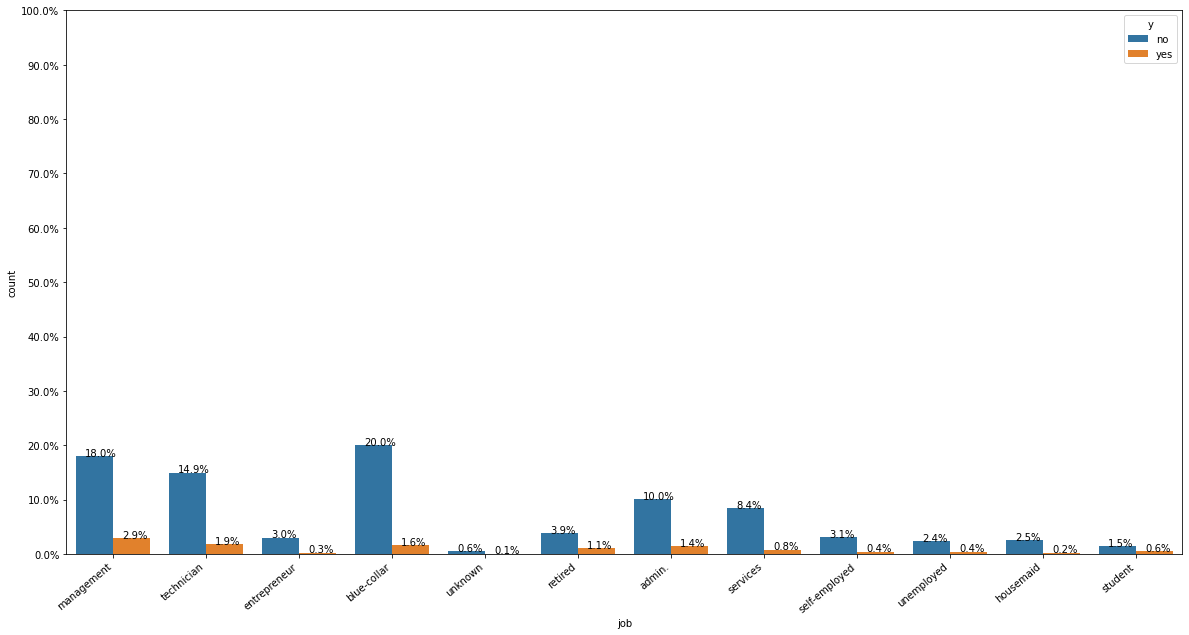

In [23]:
countplot_withY(data.select_dtypes(include=["object"]).columns[0], data)

The customers who have a job of managment, blue-collar, and technician have the highest rate of subscribing a term deposit. They are also the highest of not subscribing. 

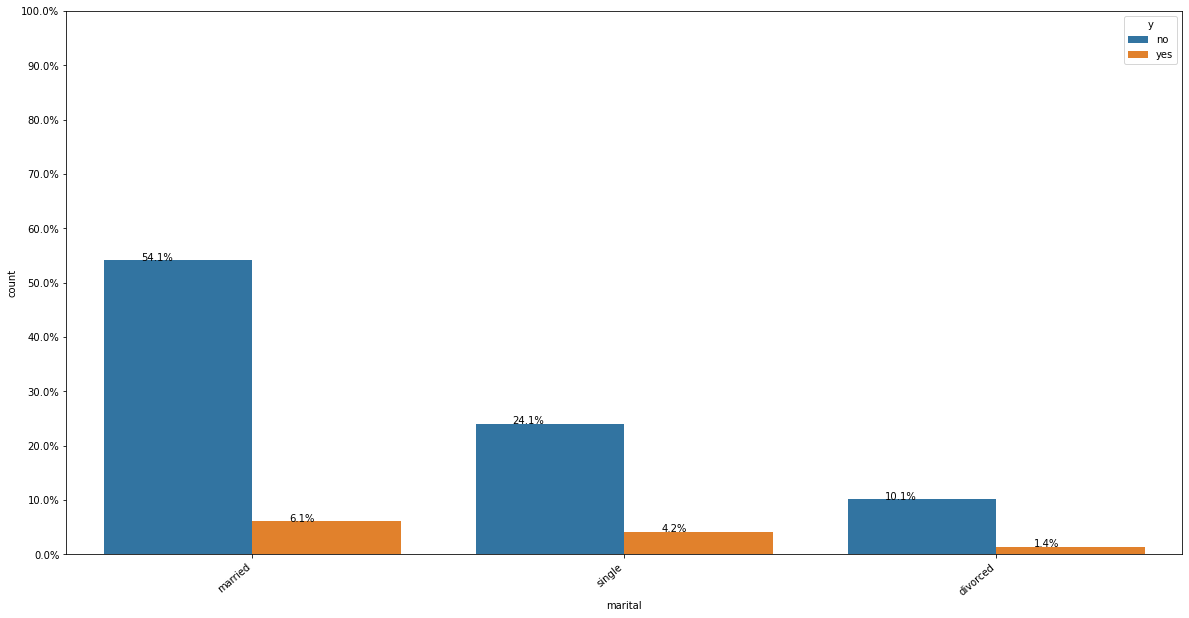

In [24]:
countplot_withY(data.select_dtypes(include=["object"]).columns[1], data)

Majority of the customers are married. Followed by Single, divorced and unknown.

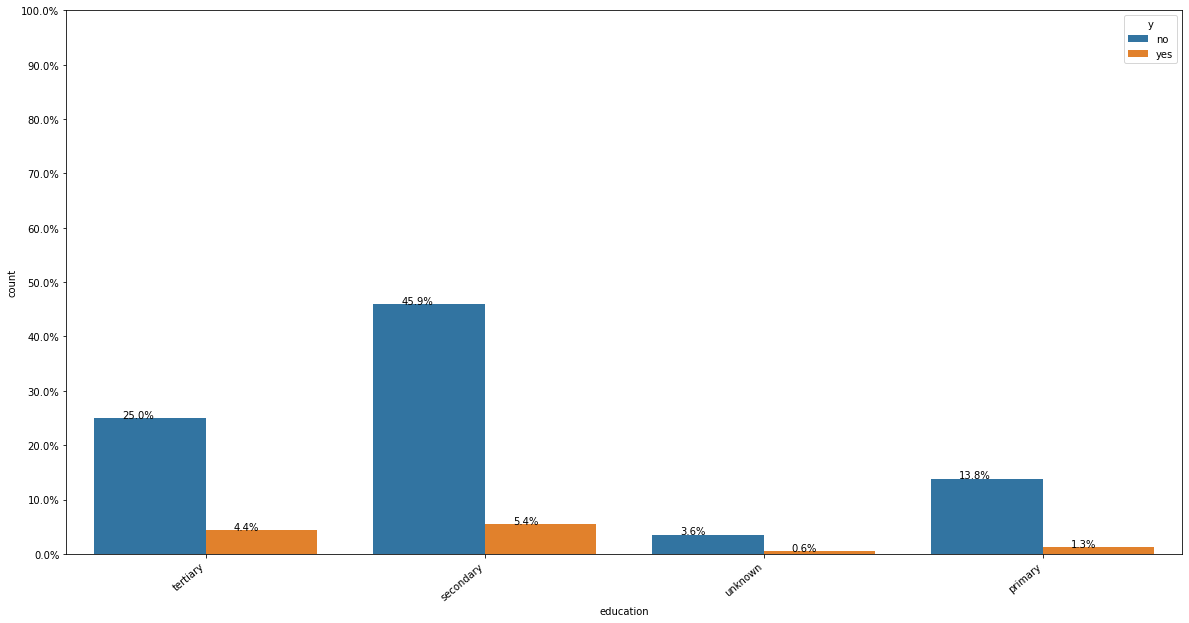

In [25]:
countplot_withY(data.select_dtypes(include=["object"]).columns[2], data)

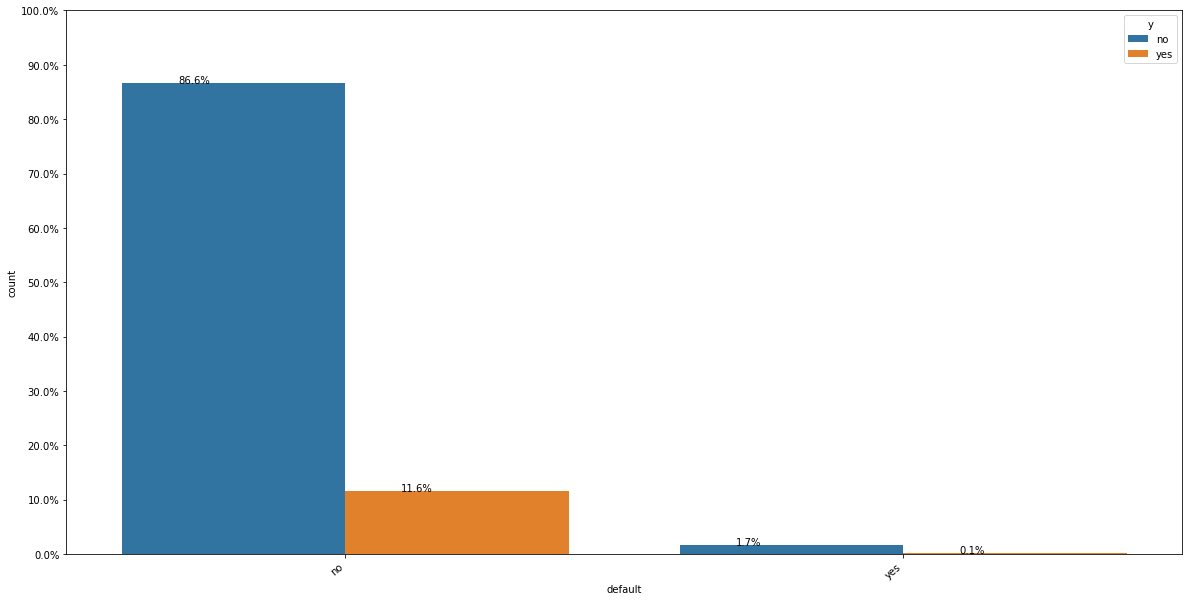

In [26]:
countplot_withY(data.select_dtypes(include=["object"]).columns[3], data)

Default is majority with no

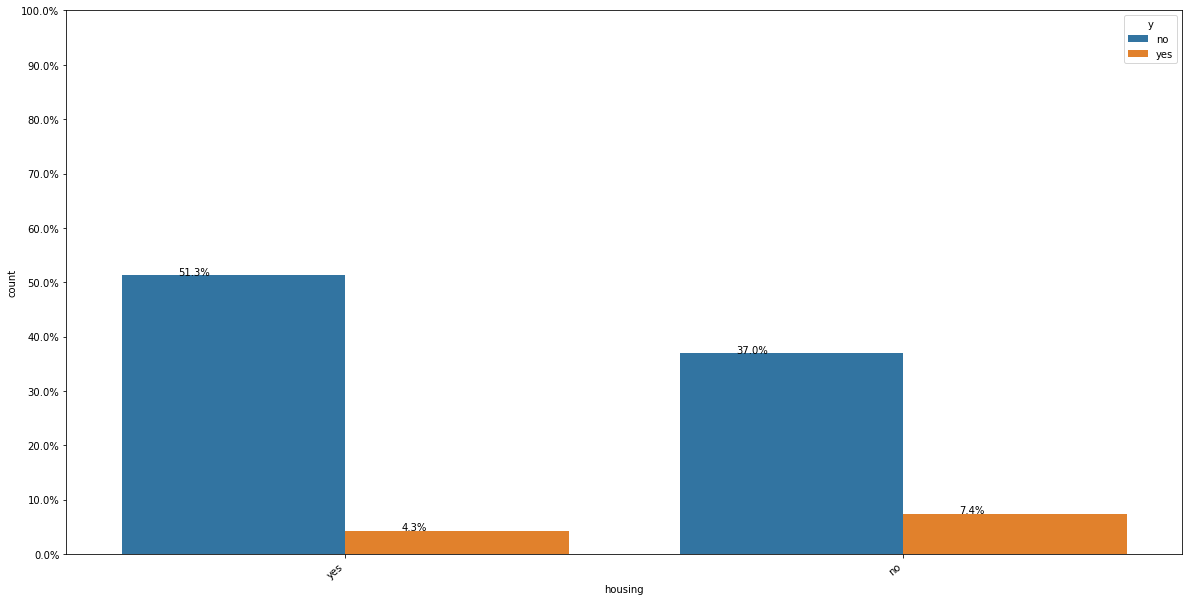

In [27]:
countplot_withY(data.select_dtypes(include=["object"]).columns[4], data)

The customer who has a housing loan are higher with yes class and less with no class

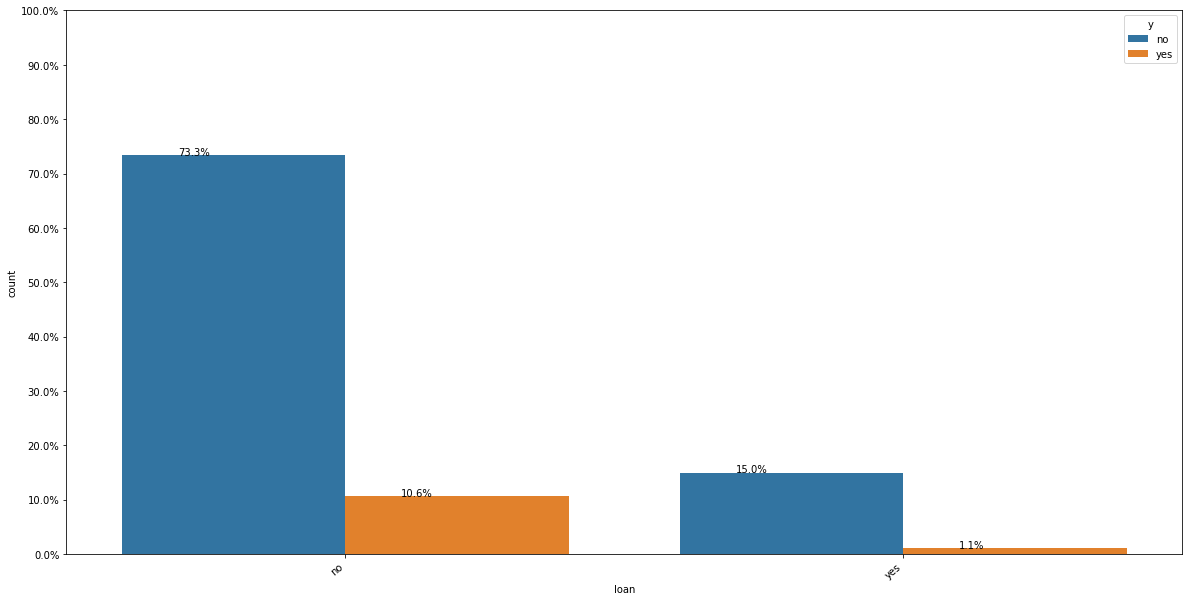

In [28]:
countplot_withY(data.select_dtypes(include=["object"]).columns[5], data)

As we can see from the above plot, majority of the customers have a housing loan.

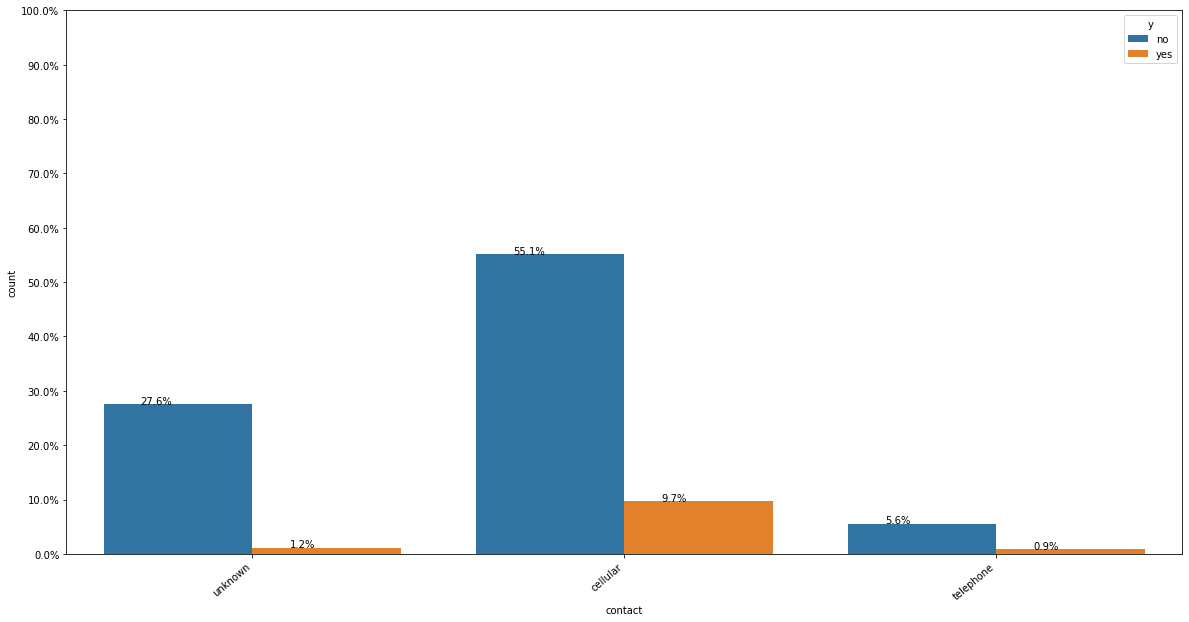

In [29]:
countplot_withY(data.select_dtypes(include=["object"]).columns[6], data)

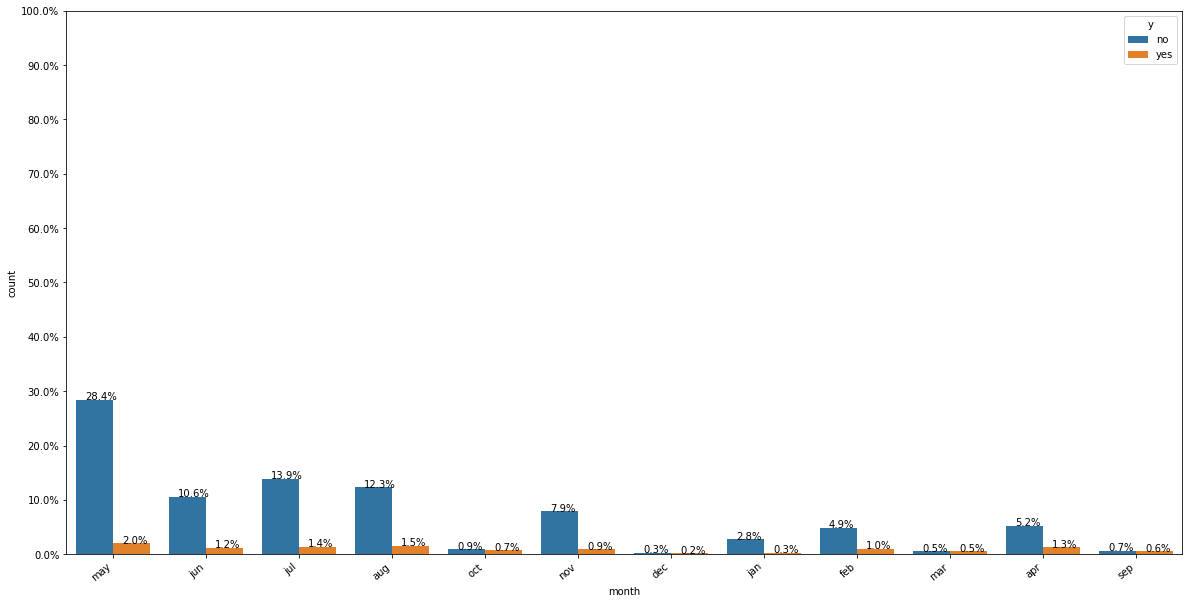

In [30]:
countplot_withY(data.select_dtypes(include=["object"]).columns[7], data)

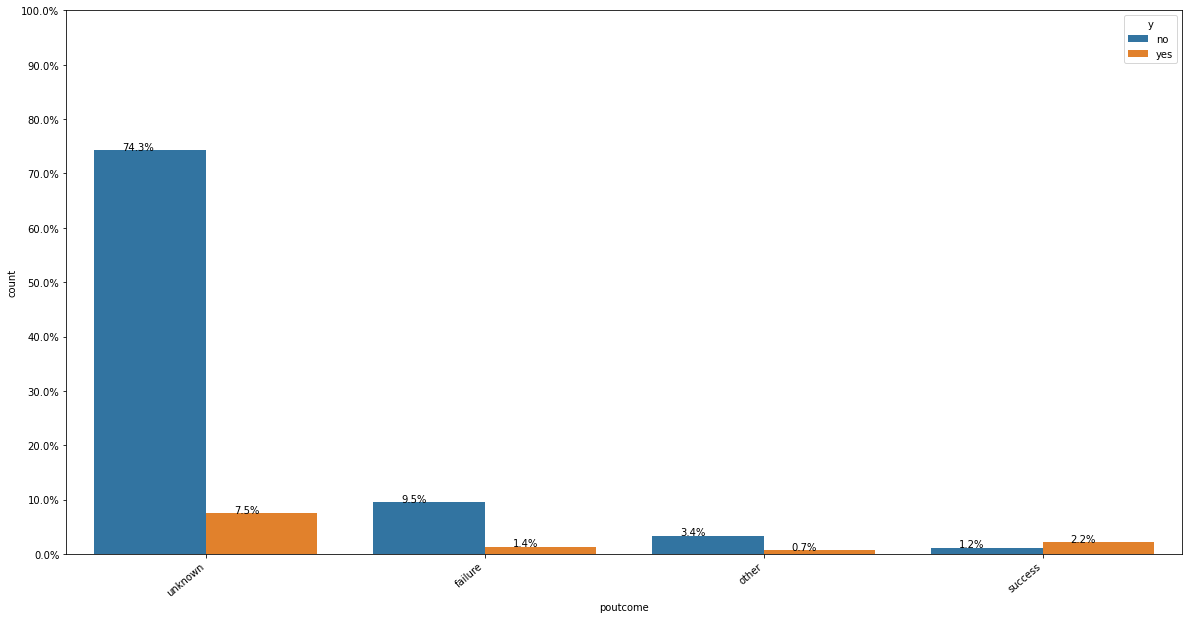

In [31]:
countplot_withY(data.select_dtypes(include=["object"]).columns[8], data)

poutcome has highest with unknown with yes and no classes.

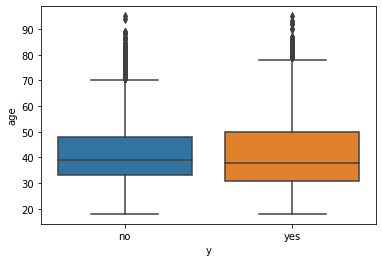

In [33]:
sns.boxplot(data=data, x="y", y="age")
plt.show()

Both the customers that subscibed or didn’t subscribe has a median age of around 38–40. So age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

<AxesSubplot:xlabel='age', ylabel='Density'>

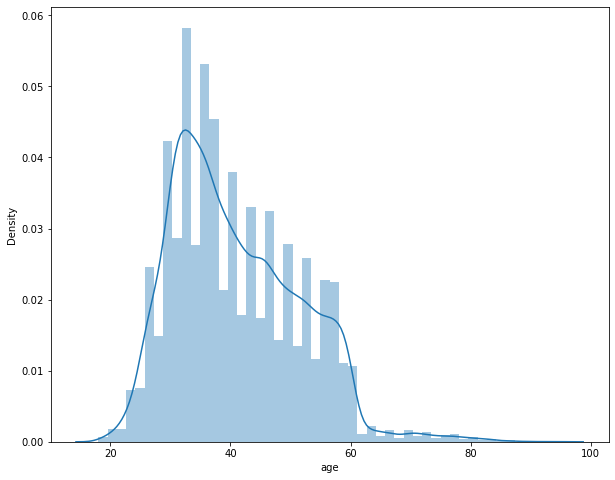

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

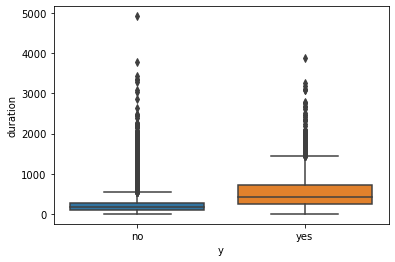

In [35]:
sns.boxplot(data=data, x="y", y="duration")
plt.show()

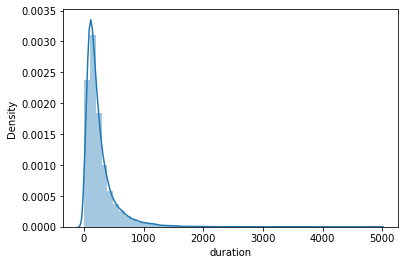

In [36]:
sns.distplot(data['duration'])
plt.show()

The duration of a customer can be useful for predicting the target variable. 

Text(0.5, 1.05, 'Pearson correlation of Features')

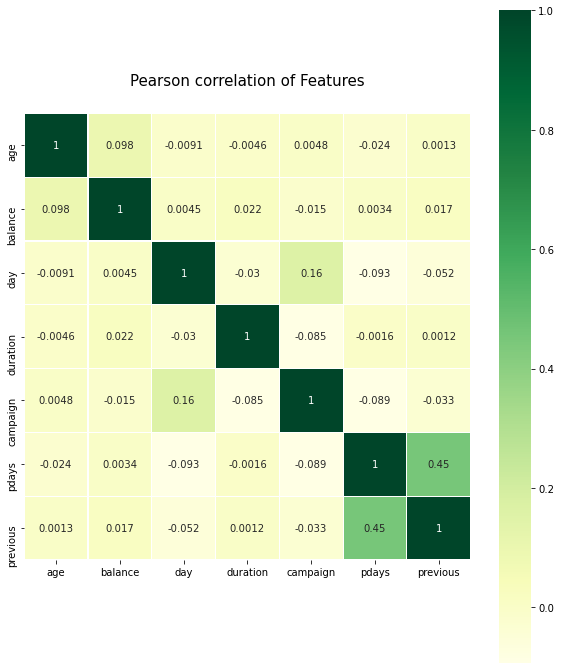

In [37]:
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

previous and pdays have the highest correlation with value of 0.45

# Final Recommendations

 - The customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. So the buiseness should send offers to them.
 - Majority of the customers are married. Followed by Single, divorced and unknown. The campaign should focus on the married customers
 - Customers with education is secondary is the highest with yes,so the campaigns should focus on those customers
 - When customers has no credit in default, the customers is likely to buy our product. So the campaign should focus on those customers
 - Customers with no housing loans are likely to buy our product
 - Majority of the customers have a housing loan.
 - Customers with cellular phones are likely to buy our products
 - Customers with unknown outcome of the previous marketing campaign is the majority
 - Both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. So, the campaign should focus on this age group
 - Age and duration are not necessarily a good indicator for which customer will subscribe and which customer will not.

# Model

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# First of all, we import all the packages that are required in this porject. 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv("bank-full.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Pre-Processing

In [4]:
data = data.drop("duration",axis=1)

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [6]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
2807,44,services,single,secondary,no,0,yes,no,unknown,14,may,1,-1,0,unknown,no
4878,34,management,single,tertiary,no,0,yes,no,unknown,21,may,1,-1,0,unknown,no
12754,25,blue-collar,married,primary,no,0,no,no,cellular,7,jul,1,-1,0,unknown,no
13576,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,-1,0,unknown,no
15760,35,management,married,tertiary,no,0,yes,no,cellular,21,jul,3,-1,0,unknown,no
21489,47,technician,married,secondary,no,0,no,no,cellular,19,aug,2,-1,0,unknown,no
22093,31,management,single,tertiary,no,0,no,no,cellular,21,aug,2,-1,0,unknown,no
22142,32,technician,single,tertiary,no,0,no,no,cellular,21,aug,2,-1,0,unknown,no
22160,34,management,single,tertiary,no,0,no,no,cellular,21,aug,2,-1,0,unknown,no
22318,32,management,single,tertiary,no,0,no,no,cellular,22,aug,2,-1,0,unknown,no


In [7]:
data_dup.shape

(16, 16)

In [8]:
data = data.drop_duplicates()
data.shape

(45195, 16)

In [9]:
data_x = data.iloc[:, :-1]
data_y = data["y"]

In [10]:
data_x.shape

(45195, 15)

In [11]:
data_y.shape

(45195,)

In [12]:
X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size = 0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size = 0.2)

In [13]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)


In [15]:
categorical_cols = data.drop("y",axis=1).select_dtypes(include=["object"]).columns.to_list()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [16]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  poutcome
Shape of train:  (28924, 50)
Shape of CV:  (7232, 50)
Shape of test:  (9039, 50)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28924 entries, 24349 to 38517
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  28924 non-null  int64
 1   balance              28924 non-null  int64
 2   day                  28924 non-null  int64
 3   campaign             28924 non-null  int64
 4   pdays                28924 non-null  int64
 5   previous             28924 non-null  int64
 6   job_admin.           28924 non-null  int64
 7   job_blue-collar      28924 non-null  int64
 8   job_entrepreneur     28924 non-null  int64
 9   job_housemaid        28924 non-null  int64
 10  job_management       28924 non-null  int64
 11  job_retired          28924 non-null  int64
 12  job_self-employed    28924 non-null  int64
 13  job_services         28924 non-null  int64
 14  job_student          28924 non-null  int64
 15  job_technician       28924 non-null  int64
 16  job_unemployed    

# Models

## 1 - Logistic Regression

In [19]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))
     

AUC score without duration column:  0.7397412909806098


- On one hot encoded data:

AUC for k =  1e-05 is 0.6541700058618805
AUC for k =  0.0001 is 0.7110057042421702
AUC for k =  0.001 is 0.7435771818985886
AUC for k =  0.01 is 0.7448407428069251
AUC for k =  0.1 is 0.7435590582100781
AUC for k =  1 is 0.7417576390875101
AUC for k =  10 is 0.7456636715383519
AUC for k =  100 is 0.740349277459512
AUC for k =  1000 is 0.7420519602373825


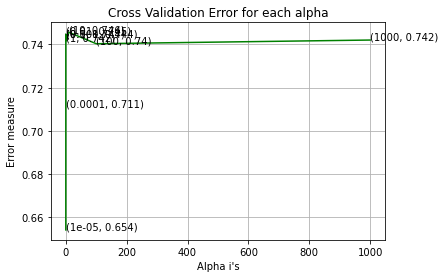

For values of best alpha =  10 The train AUC is: 0.7381050303672549
For values of best alpha =  10 The cross validation AUC is: 0.7456636715383519
For values of best alpha =  10 The test AUC is: 0.7384804571338721


In [22]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

- On Response coded data:

AUC for k =  1e-05 is 0.6541700058618805
AUC for k =  0.0001 is 0.7110057042421702
AUC for k =  0.001 is 0.7435771818985886
AUC for k =  0.01 is 0.7448407428069251
AUC for k =  0.1 is 0.7435590582100781
AUC for k =  1 is 0.7417576390875101
AUC for k =  10 is 0.7456636715383519
AUC for k =  100 is 0.740349277459512
AUC for k =  1000 is 0.7420519602373825


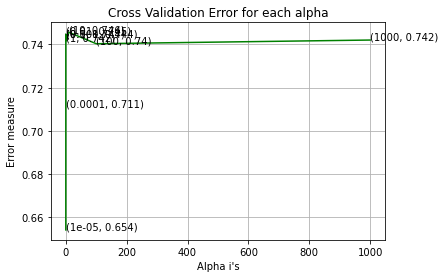

For values of best alpha =  10 The train AUC is: 0.7381050303672549
For values of best alpha =  10 The cross validation AUC is: 0.7456636715383519
For values of best alpha =  10 The test AUC is: 0.7384804571338721


In [24]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

## 2 - SVM

- On one hot encoded data:

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.5
AUC for alpha =  0.01 is 0.5648391003476538
AUC for alpha =  0.1 is 0.6541664188818628
AUC for alpha =  1 is 0.6841044868400311
AUC for alpha =  10 is 0.6170981898022159
AUC for alpha =  100 is 0.6209962931393344
AUC for alpha =  1000 is 0.6316267803928121


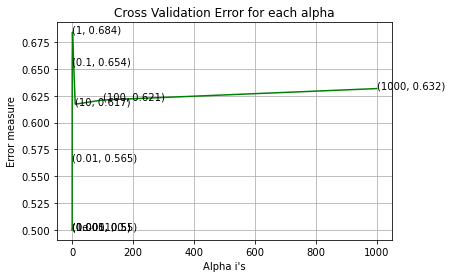

For values of best alpha =  1 The train AUC is: 0.5620997406749615
For values of best alpha =  1 The cross validation AUC is: 0.5643176667261349
For values of best alpha =  1 The test AUC is: 0.5696721551215218


In [27]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

- On Response coded data:

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.5
AUC for alpha =  0.01 is 0.6460870295746503
AUC for alpha =  0.1 is 0.5970143111063284
AUC for alpha =  1 is 0.6771259228214053
AUC for alpha =  10 is 0.5961003863555057
AUC for alpha =  100 is 0.6300587037598158
AUC for alpha =  1000 is 0.6361920620132209


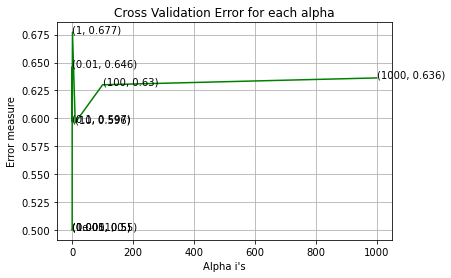

For values of best alpha =  1 The train AUC is: 0.5828714780764522
For values of best alpha =  1 The cross validation AUC is: 0.5855742990993849
For values of best alpha =  1 The test AUC is: 0.5871950196536586


In [28]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

## 3 - Random Forest

- On one hot encoded data:

AUC for number of estimators =  10 is 0.7873821370283004
AUC for number of estimators =  50 is 0.8009095826171173
AUC for number of estimators =  100 is 0.7996275204434262
AUC for number of estimators =  500 is 0.7985040405442015
AUC for number of estimators =  1000 is 0.7987188817684189
AUC for number of estimators =  2000 is 0.7984657164945388
AUC for number of estimators =  3000 is 0.7988030814046237


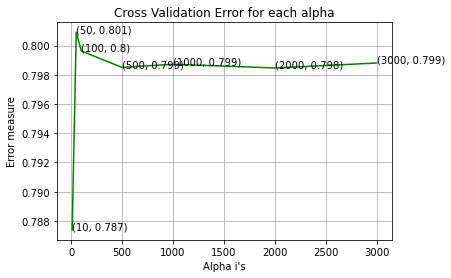

For values of best alpha =  50 The train AUC is: 0.9999971226551445
For values of best alpha =  50 The cross validation AUC is: 0.8009095826171173
For values of best alpha =  50 The test AUC is: 0.7792199443159991


In [31]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

- On Response coded data:

AUC for number of estimators =  10 is 0.7873821370283004
AUC for number of estimators =  50 is 0.8009095826171173
AUC for number of estimators =  100 is 0.7996275204434262
AUC for number of estimators =  500 is 0.7985040405442015
AUC for number of estimators =  1000 is 0.7987188817684189
AUC for number of estimators =  2000 is 0.7984657164945388
AUC for number of estimators =  3000 is 0.7988030814046237


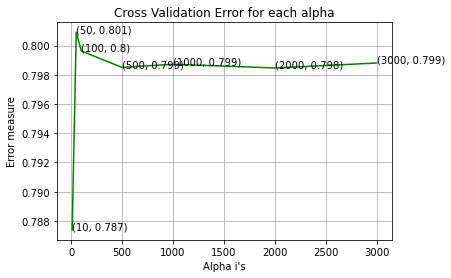

For values of best alpha =  50 The train AUC is: 0.9999971226551445
For values of best alpha =  50 The cross validation AUC is: 0.8009095826171173
For values of best alpha =  50 The test AUC is: 0.7792199443159991


In [32]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

## 4 - XGBoost

- On one hot encoded data:

In [38]:
x_cfl=XGBClassifier(tree_method='gpu_hist', max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=10, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3
[21:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10; 1/20] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3; total time=  10.1s
[CV 2/10; 1/20] START colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3
[21:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like t

[CV 6/10; 2/20] END colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=2000, subsample=0.5; total time=   7.6s
[CV 7/10; 2/20] START colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=2000, subsample=0.5
[21:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10; 2/20] END colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=2000, subsample=0.5; total time=   9.2s
[CV 8/10; 2/20] START colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=2000, subsample=0.5
[21:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

[CV 2/10; 4/20] END colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=1; total time=   4.4s
[CV 3/10; 4/20] START colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=1
[21:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/10; 4/20] END colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=1; total time=   4.0s
[CV 4/10; 4/20] START colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=1
[21:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

[CV 8/10; 5/20] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   2.0s
[CV 9/10; 5/20] START colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1
[21:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10; 5/20] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   2.2s
[CV 10/10; 5/20] START colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1
[21:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

[CV 4/10; 7/20] END colsample_bytree=0.3, learning_rate=0.15, max_depth=5, n_estimators=1000, subsample=0.1; total time=   6.8s
[CV 5/10; 7/20] START colsample_bytree=0.3, learning_rate=0.15, max_depth=5, n_estimators=1000, subsample=0.1
[21:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/10; 7/20] END colsample_bytree=0.3, learning_rate=0.15, max_depth=5, n_estimators=1000, subsample=0.1; total time=   6.3s
[CV 6/10; 7/20] START colsample_bytree=0.3, learning_rate=0.15, max_depth=5, n_estimators=1000, subsample=0.1
[21:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

[CV 10/10; 8/20] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.1; total time=   1.1s
[CV 1/10; 9/20] START colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.3
[21:22:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10; 9/20] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.3; total time=   2.3s
[CV 2/10; 9/20] START colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.3
[21:22:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

[CV 6/10; 10/20] END colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1; total time=   6.6s
[CV 7/10; 10/20] START colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1
[21:23:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10; 10/20] END colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1; total time=   9.4s
[CV 8/10; 10/20] START colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1
[21:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

[CV 1/10; 12/20] END colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.3; total time=  39.7s
[CV 2/10; 12/20] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.3
[21:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10; 12/20] END colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.3; total time=  41.3s
[CV 3/10; 12/20] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.3
[21:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

[CV 6/10; 13/20] END colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1; total time=   3.3s
[CV 7/10; 13/20] START colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1
[21:30:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10; 13/20] END colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1; total time=   6.2s
[CV 8/10; 13/20] START colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1
[21:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

[CV 2/10; 15/20] END colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.3; total time=   1.9s
[CV 3/10; 15/20] START colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.3
[21:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/10; 15/20] END colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.3; total time=   1.9s
[CV 4/10; 15/20] START colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.3
[21:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

[CV 7/10; 16/20] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1; total time=  12.1s
[CV 8/10; 16/20] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1
[21:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10; 16/20] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1; total time=   7.7s
[CV 9/10; 16/20] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1
[21:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

[CV 2/10; 18/20] END colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.3; total time=   3.6s
[CV 3/10; 18/20] START colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.3
[21:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/10; 18/20] END colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.3; total time=   3.1s
[CV 4/10; 18/20] START colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.3
[21:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

[CV 7/10; 19/20] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=2000, subsample=0.5; total time=  16.8s
[CV 8/10; 19/20] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=2000, subsample=0.5
[21:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10; 19/20] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=2000, subsample=0.5; total time=  10.4s
[CV 9/10; 19/20] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=2000, subsample=0.5
[21:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

In [39]:
x_cfl=XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.1, \
                    colsample_bytree=0.5,subsample=1,tree_method='gpu_hist', max_bin=16)
x_cfl.fit(X_train,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ("For values of best alpha = 200 The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_test)
print("For values of best alpha = 200 The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

[21:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

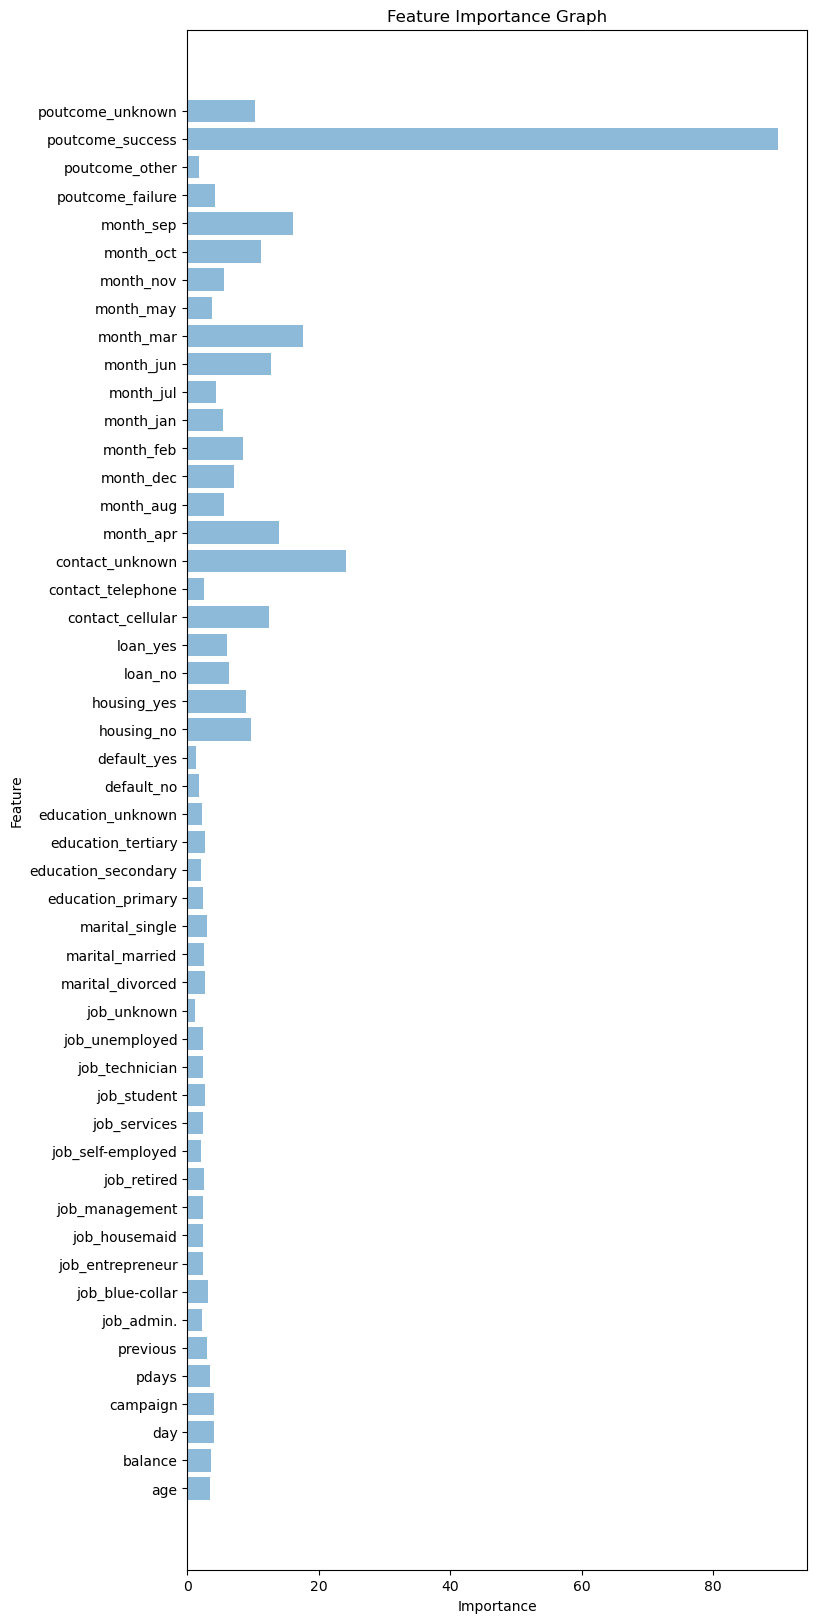

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
feature_importance = x_cfl.get_booster().get_score(importance_type='gain')

objects = feature_importance.keys()
y_pos = np.arange(len(objects))
performance = feature_importance.values()
plt.figure(figsize=(8,20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

- On Response coded data:

In [41]:
x_cfl=XGBClassifier(tree_method='gpu_hist', max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=5, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1
[21:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 1/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.6s
[CV 2/5; 1/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1
[21:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

[CV 1/5; 4/20] END colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.1; total time=   6.6s
[CV 2/5; 4/20] START colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.1
[21:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 4/20] END colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.1; total time=  10.6s
[CV 3/5; 4/20] START colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.1
[21:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

[CV 2/5; 7/20] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.1; total time=   1.0s
[CV 3/5; 7/20] START colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.1
[21:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 7/20] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.1; total time=   1.1s
[CV 4/5; 7/20] START colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.1
[21:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

[CV 3/5; 10/20] END colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=1000, subsample=0.1; total time=   8.6s
[CV 4/5; 10/20] START colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=1000, subsample=0.1
[22:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 10/20] END colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=1000, subsample=0.1; total time=   8.6s
[CV 5/5; 10/20] START colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=1000, subsample=0.1
[22:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

[CV 3/5; 13/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   2.2s
[CV 4/5; 13/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5
[22:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 13/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   2.0s
[CV 5/5; 13/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5
[22:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

[CV 4/5; 16/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.9s
[CV 5/5; 16/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1
[22:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 16/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   1.0s
[CV 1/5; 17/20] START colsample_bytree=0.1, learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.3
[22:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error

[CV 5/5; 19/20] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.3s
[CV 1/5; 20/20] START colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.1
[22:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 20/20] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.1; total time=   1.8s
[CV 2/5; 20/20] START colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.1
[22:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'e

In [42]:
x_cfl=XGBClassifier(n_estimators=2000,max_depth=3,learning_rate=0.01, \
                    colsample_bytree=0.5,subsample=1,tree_method='gpu_hist', max_bin=16)
x_cfl.fit(X_train,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ("For values of best alpha = 2000 The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_test)
print("For values of best alpha = 2000 The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

[22:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

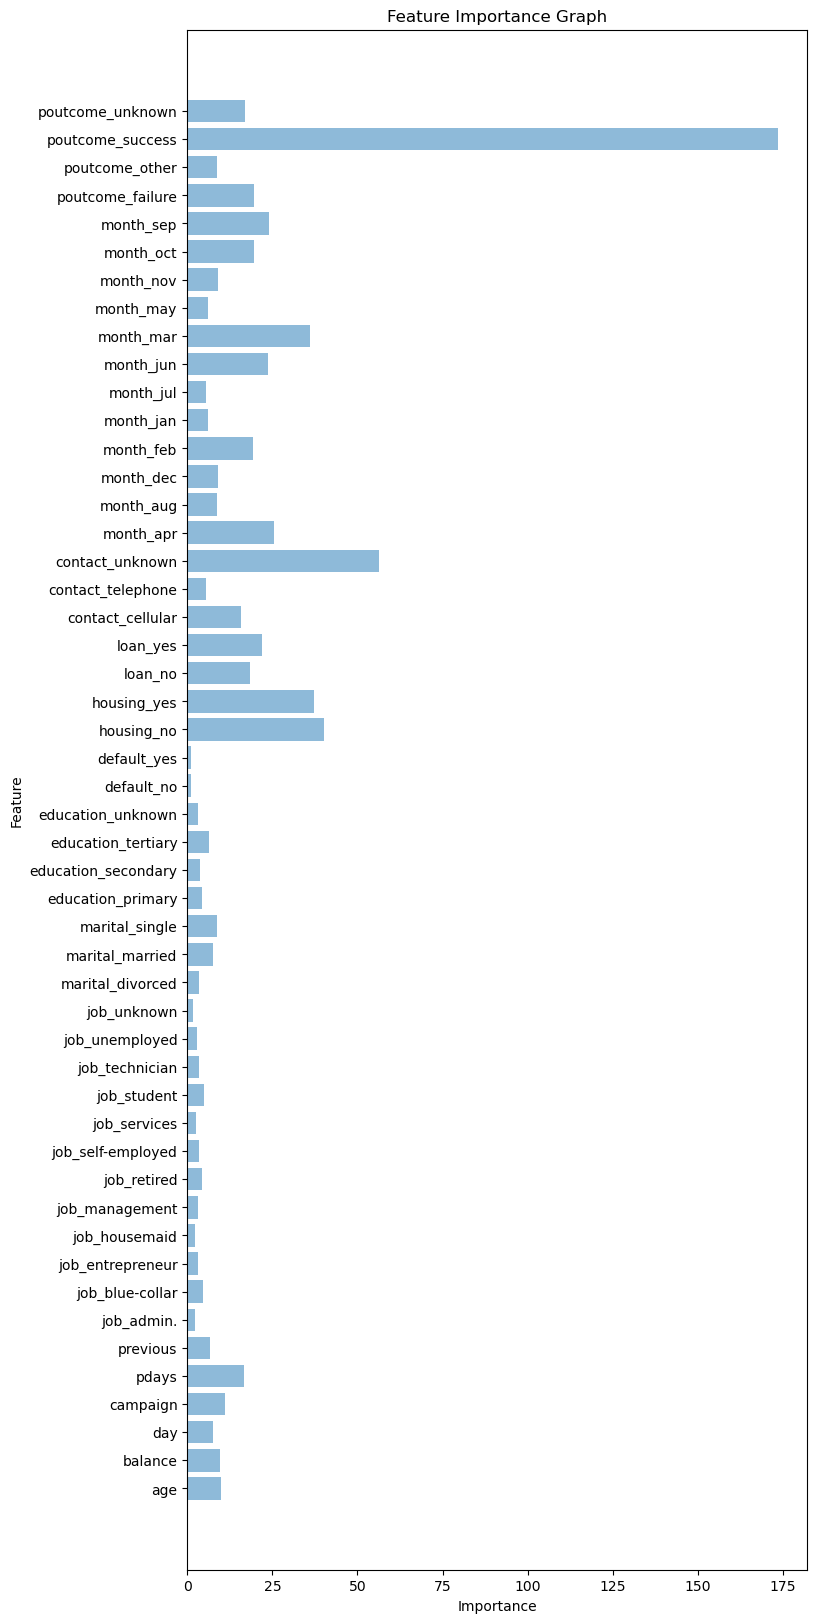

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt; plt.rcdefaults()
feature_importance = x_cfl.get_booster().get_score(importance_type='gain')

objects = feature_importance.keys()
y_pos = np.arange(len(objects))
performance = feature_importance.values()
plt.figure(figsize=(8,20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

In [55]:
performance = {
    'Encoding': ['One Hot Encoding', "", "", "", 'Response Coding', "", "", ""],
    'Model': ["Logistic Regression", "SVM", "Random Forest", "XGBoost","Logistic Regression", "SVM", "Random Forest", "XGBoost"],
    'Train AUC': [ 0.74, 0.56, 1, 0.86, 0.74, 0.56, 1, 0.86 ],
    'Test AUC': [ 0.74, 0.57, 0.78, 0.79, 0.74, 0.59, 0.78, 0.79 ]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(performance)

# Display the DataFrame
df


,Encoding,Model,Train AUC,Test AUC
0,One Hot Encoding,Logistic Regression,0.74,0.74
1,,SVM,0.56,0.57
2,,Random Forest,1.00,0.78
3,,XGBoost,0.86,0.79
4,Response Coding,Logistic Regression,0.74,0.74
5,,SVM,0.56,0.59
6,,Random Forest,1.00,0.78
7,,XGBoost,0.86,0.79
